In [1]:
# подготовимся к импорту API который находится в родительской папке относительно этой тетрадки
import sys
sys.path.insert(0,'..')
# импортируем api
import unifloc_vba_python_api.python_api as python_api 
# готовим объект с доступом к надстройке. При этом надстройка откроется и запустится excel 
UniflocVBA = python_api.API("../UniflocVBA_7.xlam")
print("import excel with unifloc vba done. version " + UniflocVBA.unf_version())

import excel with unifloc vba done. version 7.24


Импорт необходимых модулей

In [2]:
import numpy as np
from matplotlib import pylab as plt
import matplotlib as mpl

Построение паспортных характеристик насоса

In [3]:
## Физико-химические свойства флюида PVT
gamma_gas_ = 0.8 # удельная плотность газа, по воздуху;
gamma_oil_ = 0.9 # удельная плотность нефти, по воде;
gamma_wat_ = 1 # удельная плотность воды, по воде;
Rsb_ = 80 # газосодержание при давлении насыщения, м3/м3;
Rp_  = 80 # замерной газовый фактор, м3/м3;
Pb_cal_ = 120 # давление насыщения при температуре пласта, атм;
Tres_ = 100 # пластовая температура, С;
Bob_ = 1.2 # объемный коэффициент нефти, м3/м3;
muob_ = 1 # вязкость нефти при давлении насыщения, сП;
## Параметры потока флюида
Q_ = 50 # дебит жидкости на поверхности, м3/сут;
fw_ = 50 # объемная обводненность, %;
## Данные по ЭЦН
Q_ESP_ = 150 # номинальный дебит, м3/сут;
Head_ESP_ = 2000 # номинальный напор системы УЭЦН, м;
Freq_ = 60 # частота вращения ЭЦН, Гц;
PumpID_ = UniflocVBA.ESP_id_by_rate(Q_ESP_) # идентификатор типового насоса;
print("ЭЦН ID - "+ str(PumpID_))
ESP_name = UniflocVBA.ESP_name(PumpID_) #  название ЭЦН по номеру;
print("ЭЦН имя - "+ ESP_name)
Qmax_ = UniflocVBA.ESP_rate_max_sm3day(Freq_, PumpID_) # максимальный дебит ЭЦН для заданной частоты при номинаьной кривой РНХ;
print("ЭЦН Qmax - "+ str(Qmax_))
NumStage_ = 100 # количество ступеней;
print("Ступени - "+ str(NumStage_))
KsepGasSep_ = 80 # коэффициент сепарации газосепаратора УЭЦН;
PKsep = 80 # давление сепарации, атм;
TKsep = 80 # температура сепарации, С;
mu = 1 # вязкость жидкости, сП;
## Настройка графика
N_ = 32

ЭЦН ID - 748
ЭЦН имя - ЭЦН5А-199
ЭЦН Qmax - 456.0
Ступени - 100


Расчет номинальных характеристик ЭЦН

In [4]:
dQ = Qmax_/N_ 
Q_ar = np.arange(1, Qmax_+1, dQ) #
head_list, eff_list, power_list = [], [], []
for q in Q_ar:
    head_m = UniflocVBA.ESP_head_m(q, NumStage_, Freq_, PumpID_, mu)
    head_list.append(head_m)
    eff_fr = UniflocVBA.ESP_eff_fr(q, NumStage_, Freq_, PumpID_, mu)
    eff_list.append(eff_fr)
    power_W = UniflocVBA.ESP_power_W(q, NumStage_, Freq_, PumpID_, mu)
    power_list.append(power_W)

Характеристика ЭЦН

<function matplotlib.pyplot.show(*args, **kw)>

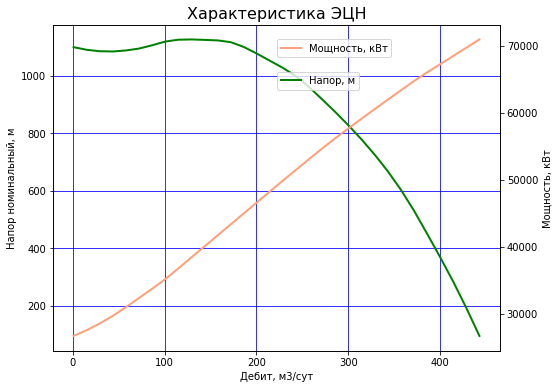

In [5]:
mpl.rcParams['figure.figsize'] = (8.0, 6.0)

ax_01 = plt.axes()
ax_01.plot(Q_ar, head_list, 'green', label='Напор, м', linewidth=2 )
ax_01.grid(color = 'b')
ax_01.set_xlabel(u'Дебит, м3/сут')
ax_01.set_ylabel(u'Напор номинальный, м')
ax_02 = ax_01.twinx()
ax_02.plot(Q_ar, power_list, 'lightsalmon',  label='Мощность, кВт', linewidth=2 )
ax_02.set_ylabel(u'Мощность, кВт')

ax_02.legend(loc=(0.5, 0.90))
ax_01.legend(loc=(0.5, 0.80))
ax_01.set_title("Характеристика ЭЦН", fontsize=16)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

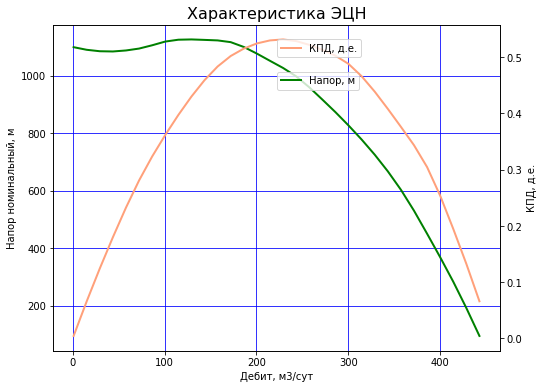

In [6]:
ax_01 = plt.axes()
ax_01.plot(Q_ar, head_list, 'green', label='Напор, м', linewidth=2 )
ax_01.grid(color = 'b')
ax_01.set_xlabel(u'Дебит, м3/сут')
ax_01.set_ylabel(u'Напор номинальный, м')
ax_02 = ax_01.twinx()
ax_02.plot(Q_ar, eff_list, 'lightsalmon',  label='КПД, д.е.', linewidth=2 )
ax_02.set_ylabel(u'КПД, д.е.')

ax_02.legend(loc=(0.5, 0.90))
ax_01.legend(loc=(0.5, 0.80))
ax_01.set_title("Характеристика ЭЦН", fontsize=16)
plt.show